<a href="https://colab.research.google.com/github/emanuel379/Regressao-I/blob/main/Lista_1_Regress%C3%A3o_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome:** Emanuel Victor da Silva Favorato

**Número USP:** 12558151

In [ ]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import os
import random
import time
import sys
from matplotlib import rcParams
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

5. Repita o experimento que vimos em sala. Suponha que a relação verdadeira entre as variaveis é dada por Y = β0 + β1X + ε, with ε ∼ N (0, σ2),
com β0 = 3, β1 = 5, e σ
2 = 4, por exemplo (voce pode testar outros valores também). Agora

(a) realize Nexp experimentos (e.g., Nexp = 50, 100, ...), e, para cada experimento, construa uma tabela
{(Xi
,Yi)}
N
i=1
com N pontos amostrados. Ajuste o modelo usando os estimadores βˆ
0,1 obtidos
pelo metodos de mínimos quadrados. Calcule a media empírica e desvios padrao de βˆ
0,1 e os compare
com os valores verdadeiros (β0 = 3, β1 = 5). Visualize as flutuações no modelo ajustado como vimos
em sala

Média de β^0: 2.9890901772668608, Desvio padrão de β^0: 0.7721665795637299
Média de β^1: 5.0007532239831765, Desvio padrão de β^1: 0.09786486698889423


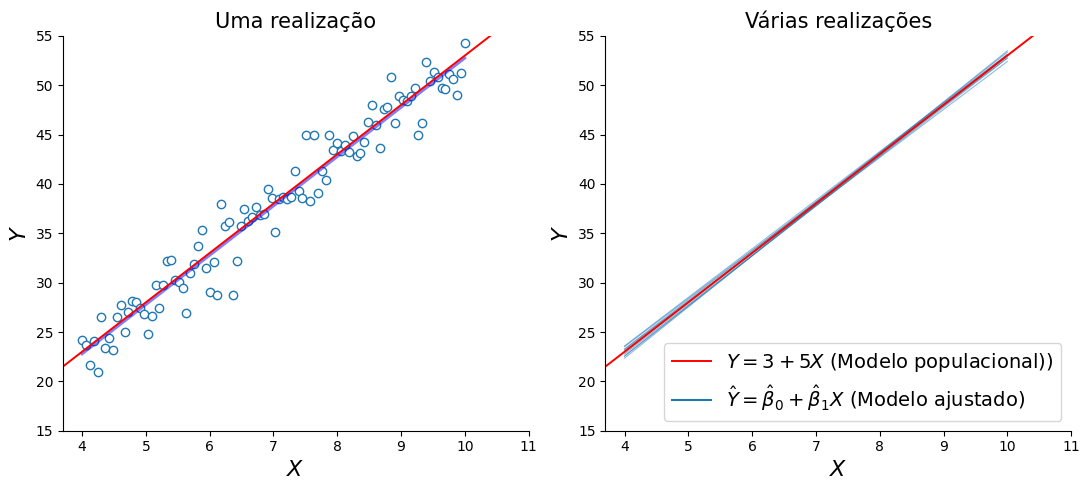

In [ ]:
number_experiments = 10
N = 100  # Número de amostras em cada experimento

# Criando a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

# Criando uma lista para armazenar os modelos ajustados
fitted_lines = []

# Criando listas para armazenar X e Y
x_values = []
y_values = []

# Lista para armazenar os valores de β^0 e β^1
beta0_values = []
beta1_values = []

for exp in range(number_experiments):
    eps = np.random.normal(0, 2, N)  # ruído

    xfinal = 10
    xinit = 4
    intercepto = 3
    slope = 5

    X = np.linspace(xinit, xfinal, N)

    # Modelo populacional
    Y = intercepto + slope * X + eps

    fit = stats.linregress(X, Y)  # Ajustando o modelo aos dados
    x = np.linspace(np.min(X), np.max(X), 100)  # x para plotar a reta ajustada
    y_model = fit.intercept + fit.slope * x  # Reta ajustada

    # Guardadando o modelo ajustado
    fitted_lines.append(y_model)

    # Guardando os valores de X e Y
    x_values.append(X)
    y_values.append(Y)

    # Armazenando os valores de β^0 e β^1
    beta0_values.append(fit.intercept)
    beta1_values.append(fit.slope)

    ax2.plot(x, y_model, '-', color='C0', linewidth=0.8, alpha=0.5)
    ax2.set_xlabel(r'$X$', fontsize=16)
    ax2.set_ylabel(r'$Y$', fontsize=16)

# Regressão linear verdadeira
xlin = np.linspace(-2 + xinit, xfinal + 2, 100)
ytrue = intercepto + slope * xlin

# Calculando a média e o desvio padrão para β^0 e β^1
mean_beta0 = np.mean(beta0_values)
std_beta0 = np.std(beta0_values)
mean_beta1 = np.mean(beta1_values)
std_beta1 = np.std(beta1_values)

print(f"Média de β^0: {mean_beta0}, Desvio padrão de β^0: {std_beta0}")
print(f"Média de β^1: {mean_beta1}, Desvio padrão de β^1: {std_beta1}")


# Plotando uma realização do modelo
ax1.set_title(r'Uma realização', fontsize=15)
ax1.plot(x_values[0], y_values[0], 'o', markerfacecolor='white')
ax1.plot(x_values[0], fitted_lines[0], '-', color='b', linewidth=2, alpha=0.5)
ax1.set_xlabel(r'$X$', fontsize=16)
ax1.set_ylabel(r'$Y$', fontsize=16)
ax1.plot(xlin, ytrue, '-', color='red', linewidth=1.4, label=r'$Y = 3 + 5X$ (True Regression)')
ax1.plot([], [], '-', color='C0', label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X$ (Fitted Model)')

# Plotando várias realizações do modelo
ax2.set_title(r'Várias realizações', fontsize=15)
ax2.plot(xlin, ytrue, '-', color='red', linewidth=1.4, label=r'$Y = 3 + 5X$ (Modelo populacional))')
ax2.plot([], [], '-', color='C0', label=r'$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X$ (Modelo ajustado)')

ax2.legend(loc='lower right', fontsize=14)

for ax in fig.get_axes():
    ax.set_xlim([3.7, 11])
    ax.set_ylim([15, 55])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

(b) (Dependência com o tamanho da amostra) Como em (a), estime os coeficientes β^0,1 usando mínimos quadrados, mas agora, em cada experimento, varie o tamanho da amostra, N. Visualize os parametros estimados βˆ0,1 como funçao de N. Discuta os resultados. Dica: Para obter resultados mais robustos,
faça várias realizações para um tamanho fixo da amostra.

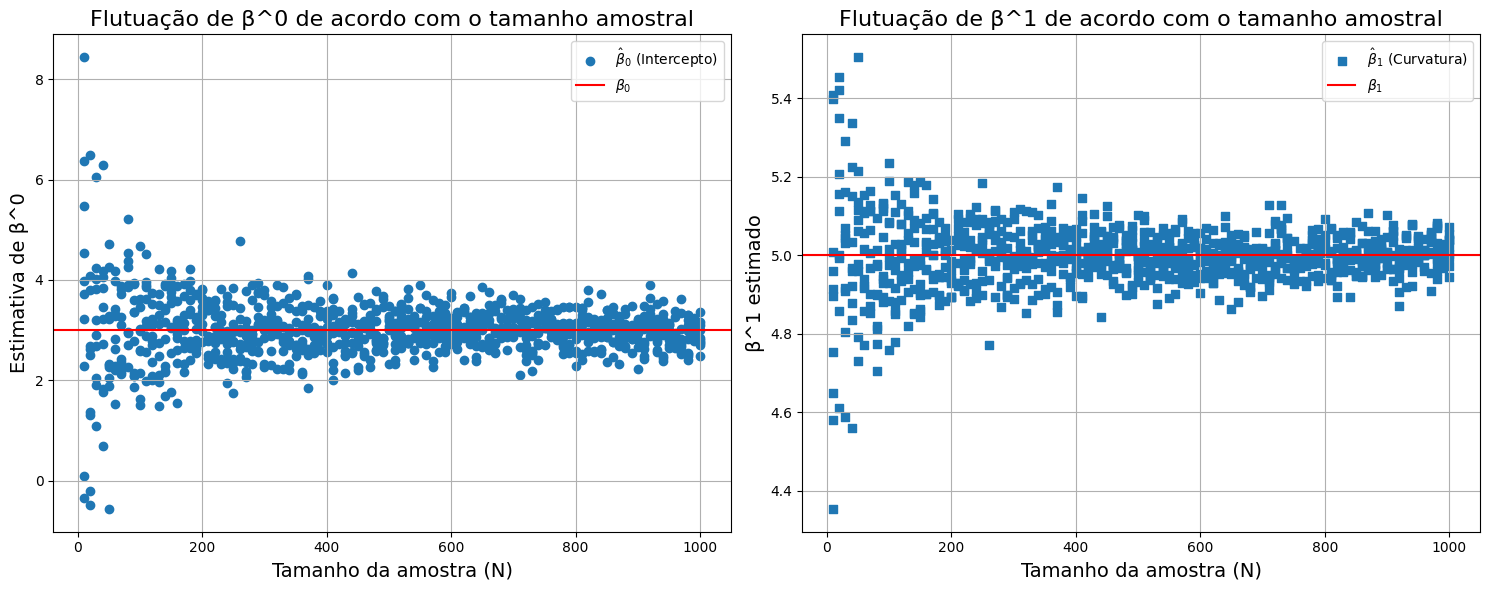



Média dos β^0 estimados com a amostra: 3.01
Média dos β^1 estimados com a amostra: 5.00


     Sample Size (N)   β^0_hat   β^1_hat
0               10.0  8.441339  4.353580
1               10.0  3.973666  4.754692
2               10.0  3.717831  4.895989
3               10.0  0.097204  5.398716
4               10.0  3.223634  4.961053
..               ...       ...       ...
995           1000.0  2.849171  5.020100
996           1000.0  3.354655  4.946012
997           1000.0  3.112354  4.995172
998           1000.0  2.735612  5.053555
999           1000.0  2.766409  5.039746

[1000 rows x 3 columns]


In [ ]:
# Parâmetros de interesse
number_experiments = 10
intercepto = 3
slope = 5

# Criando um data frame
df = pd.DataFrame({'Sample Size (N)': [], 'β^0_hat': [], 'β^1_hat': []})
index = 0
samples = [i for i in range(10, 1001, 10)]

xinit, xfinal = 4, 10

# Variando o tamanho da amostra
for N in samples:
    X = np.linspace(xinit, xfinal, N)

    for exp in range(number_experiments):
        eps = np.random.normal(0, 2, N)  # ruído

        # Relação populacional
        Y = intercepto + slope * X + eps

        fit = stats.linregress(X, Y)  # Ajustando o modelo aos dados

        # Guardando em um data frame
        df.loc[index] = [N, fit.intercept, fit.slope]
        index += 1

# Criando subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotando o primeiro subplot
axes[0].scatter(df['Sample Size (N)'], df['β^0_hat'], marker='o', label=r'$\hat{\beta}_0$ (Intercepto)')
axes[0].set_xlabel('Tamanho da amostra (N)', fontsize=14)
axes[0].set_ylabel('Estimativa de β^0', fontsize=14)
axes[0].set_title('Flutuação de β^0 de acordo com o tamanho amostral', fontsize=16)
axes[0].axhline(intercepto, color='red', linestyle='-', label=r'$\beta_0$')
axes[0].legend()
axes[0].grid(True)

# Plotando o segundo subplot
axes[1].scatter(df['Sample Size (N)'], df['β^1_hat'], marker='s', label=r'$\hat{\beta}_1$ (Curvatura)')
axes[1].set_xlabel('Tamanho da amostra (N)', fontsize=14)
axes[1].set_ylabel('β^1 estimado', fontsize=14)
axes[1].set_title('Flutuação de β^1 de acordo com o tamanho amostral', fontsize=16)
axes[1].axhline(slope, color='red', linestyle='-', label=r'$\beta_1$')
axes[1].legend()
axes[1].grid(True)

# Mostrando os plots
plt.tight_layout()
plt.show()

# Printando os resultados médios observados
print('\n')
print(f"Média dos β^0 estimados com a amostra: {df['β^0_hat'].mean():.2f}")
print(f"Média dos β^1 estimados com a amostra: {df['β^1_hat'].mean():.2f}")
print('\n')

# Printando o data frame
print(df)

Observa-se que o valor de βˆ1 e βˆ0 são, inicialmente bastante instáveis, convergindo para o verdadeiro valor de seus respectivos parâmetros para amostras com tamanho até N = 200, porém se mantendo com ruídos estáveis, próximos aos valores reais do parâmetro a partir de então, também é possível observar a convergência, em média, para os verdadeiros valores paramétricos.

(c) Para um tamanho fixo de amostra, crie uma visualização para os dados [(Xi
,Yi)] i = 1, 2, ..., N, o modelo ajustado mˆ (x) = βˆ0 + βˆ1x e seu erro padrão SE[mˆ(x)].

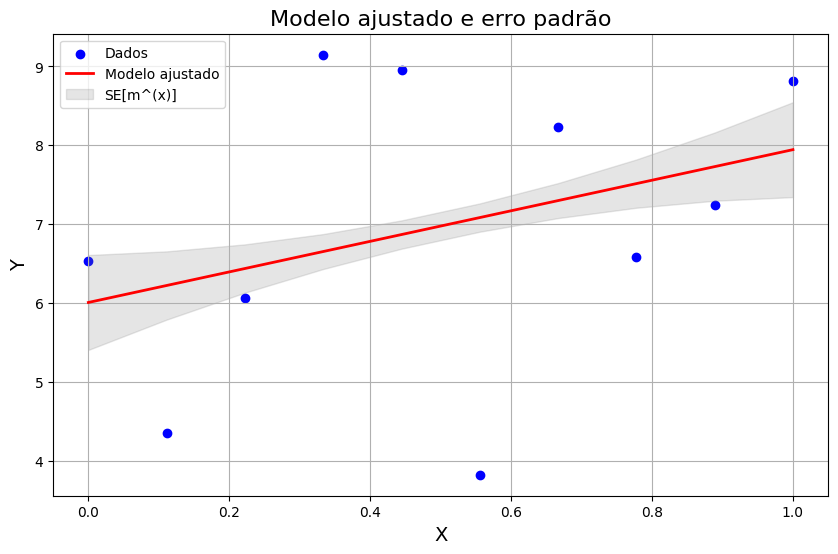

In [ ]:
# Definindo o tamanho amostral
N = 10

# Gerando dados artificiais
np.random.seed(0)
X = np.linspace(0, 1, N) # Gerando os dados
true_intercept = 3
true_slope = 5
true_noise = np.random.normal(0, 2, N)
Y = true_intercept + true_slope * X + true_noise
Sxx = np.sum((X - np.mean(X))**2)

# Ajustando um modelo linear para os dados
fit = stats.linregress(X, Y)

# Modelo ajustado e erro padrão
x_pred = np.linspace(0, 1, N)  # Gerando os valores de X para a predição
y_pred = fit.intercept + fit.slope * x_pred  # Modelo ajustado
SSE = np.sum((Y - y_pred)**2)

standard_error = []
for i in range(N):
  standard_error.append((SSE/(N - 2)*((1/N) + (((X[i] - X.mean())**2)/Sxx)))**1/2)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Dados', c='b', marker='o')
plt.plot(x_pred, y_pred, label='Modelo ajustado', c='r', linewidth=2)
plt.fill_between(x_pred, y_pred - standard_error, y_pred + standard_error, alpha=0.2, color='gray', label='SE[m^(x)]')
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Modelo ajustado e erro padrão', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

d) Também para um tamanho fixo de amostra, realize vários experimentos aumentando o intervalo de amostragem de X. Visualize Var[βˆ0] e Var[βˆ1] em função de SXX, e compare as curvas com os valores teóricos obtidos no exercício 3

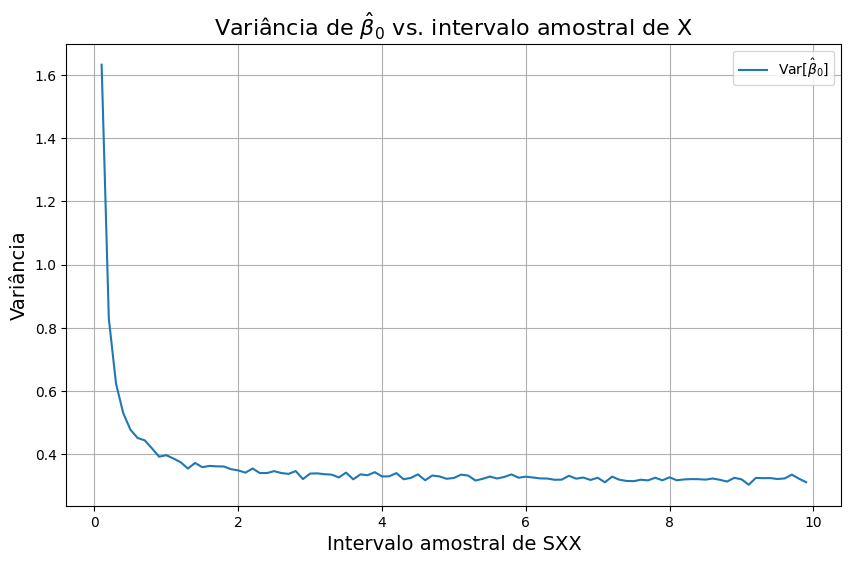

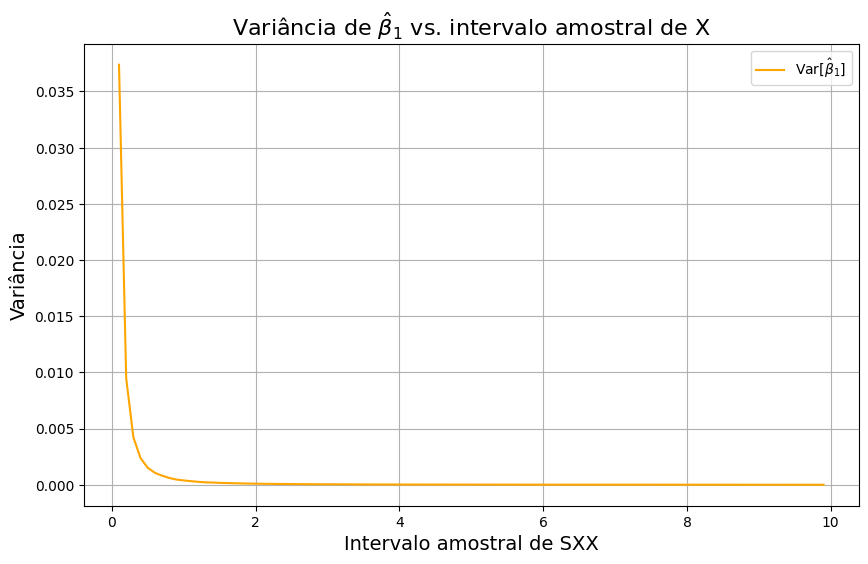

In [ ]:
# Definindo os parâmetros
number_experiments = 100
sample_size = 50
intercept = 3
slope = 5

# Variando o intervalo de amostragem para X (SXX)
sampling_intervals = np.arange(0.1, 10, 0.1)  # Ajustando o range e o passo conforme necessário
var_beta0_list = []
var_beta1_list = []

for Sxx in sampling_intervals:
    var_beta0_experiment = []
    var_beta1_experiment = []

    for exp in range(number_experiments):
        # Gerando X com intervalo amostral aumentado
        X = np.linspace(4, 4 + Sxx * (sample_size - 1), sample_size)
        eps = np.random.normal(0, 2, sample_size)  # ruído

        # Modelo real
        Y = intercept + slope * X + eps

        fit = stats.linregress(X, Y)  # Ajustando o modelo aos dados
        var_beta0_experiment.append(fit.intercept_stderr ** 2)
        var_beta1_experiment.append(fit.stderr ** 2)  # Utilizando stderr para βˆ1

    # Calculando a média de Var[βˆ0] e Var[βˆ1] para nosso SXX
    var_beta0_mean = np.mean(var_beta0_experiment)
    var_beta1_mean = np.mean(var_beta1_experiment)

    var_beta0_list.append(var_beta0_mean)
    var_beta1_list.append(var_beta1_mean)

# Plotando Var[βˆ0] vs. SXX
plt.figure(figsize=(10, 6))
plt.plot(sampling_intervals, var_beta0_list, label='Var[$\hat{\\beta}_0$]')
plt.xlabel('Intervalo amostral de SXX', fontsize=14)
plt.ylabel('Variância', fontsize=14)
plt.title('Variância de $\hat{\\beta}_0$ vs. intervalo amostral de X', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Plotando Var[βˆ1] vs. SXX
plt.figure(figsize=(10, 6))
plt.plot(sampling_intervals, var_beta1_list, label='Var[$\hat{\\beta}_1$]', color='orange')
plt.xlabel('Intervalo amostral de SXX', fontsize=14)
plt.ylabel('Variância', fontsize=14)
plt.title('Variância de $\hat{\\beta}_1$ vs. intervalo amostral de X', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

Observa-se, como esperado, uma redução na variância a medida que Sxx cresce, entretanto esse valor tende a estabilizar-se para Sxx maiores em virtude da convergência para os valores.